In [1]:
# Required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

#Part 1

### 1. Load and preview the dataset

In [2]:
df = pd.read_csv('/content/rrhh.csv')
df.head()

,Experiencia,Posicion,Hijos,Casado,Educacion,Salario
0,0.5,Analista,4,1,Bachillerato,13540
1,5.6,Analista,2,0,Licenciatura,31240
2,11.7,Analista,1,0,Licenciatura,63880
3,5.2,Analista,2,1,Licenciatura,29960
4,7.2,Coordinador,2,1,Licenciatura,34710


### Convert categorical variables into dummy variables

In [3]:
df = pd.get_dummies(df, columns=['Posicion', 'Educacion'], drop_first=True)
df.head()

,Experiencia,Hijos,Casado,Salario,Posicion_Coordinador,Posicion_Gerente,Educacion_Licenciatura,Educacion_Posgrado
0,0.5,4,1,13540,False,False,False,False
1,5.6,2,0,31240,False,False,True,False
2,11.7,1,0,63880,False,False,True,False
3,5.2,2,1,29960,False,False,True,False
4,7.2,2,1,34710,True,False,True,False


In [4]:
df.corr()['Salario'].sort_values(ascending= False)

,Salario
Salario,1.000000
Experiencia,0.663780
Posicion_Gerente,0.394371
Hijos,0.211630
Educacion_Posgrado,0.163286
Posicion_Coordinador,0.160906
Educacion_Licenciatura,0.135846
Casado,0.085462


Experience is the variable most correlated with Salary

### Separate predictors (X) and target variable (y)


In [5]:
X = df.drop('Salario', axis=1)
y = df['Salario']

### Standardize the predictor variables



In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Split data into training and test sets
train_size= 0.8, 80% is used for training and the rest will be for testing.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.80, random_state=42)

##Train a Linear Regression model

In [8]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

### Predict and evaluate

In [9]:
y_pred_lr = lr_model.predict(X_test)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print(f"\nLinear Regression - RMSE: {rmse_lr:.2f}, R²: {r2_lr:.4f}")



Linear Regression - RMSE: 5967.14, R²: 0.6510


##Train Regularized Models: Ridge, Lasso, and ElasticNet

In [10]:
# Ridge
ridge_model = RidgeCV(alphas=np.logspace(-10, 2, 100))
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

# Lasso
lasso_model = LassoCV(alphas=np.logspace(-10, 3, 100), cv=10)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))

# ElasticNet
elastic_model = ElasticNetCV(alphas=np.logspace(-10, 3, 100), l1_ratio=[.1, .5, .7, .9, .95, .99, 1], cv=10)
elastic_model.fit(X_train, y_train)
y_pred_elastic = elastic_model.predict(X_test)
rmse_elastic = np.sqrt(mean_squared_error(y_test, y_pred_elastic))


## Compare model performance

In [11]:
print(f"\nRegularized Models:")
print(f"RidgeCV      - Alpha: {ridge_model.alpha_:.2e}, RMSE: {rmse_ridge:.2f}, R²: {ridge_model.score(X_test, y_test):.4f}")
print(f"LassoCV      - Alpha: {lasso_model.alpha_:.2e}, RMSE: {rmse_lasso:.2f}, R²: {lasso_model.score(X_test, y_test):.4f}")
print(f"ElasticNetCV - Alpha: {elastic_model.alpha_:.2e}, RMSE: {rmse_elastic:.2f}, R²: {elastic_model.score(X_test, y_test):.4f}")


Regularized Models:
RidgeCV      - Alpha: 3.51e+00, RMSE: 5966.60, R²: 0.6510
LassoCV      - Alpha: 4.86e+01, RMSE: 5969.79, R²: 0.6507
ElasticNetCV - Alpha: 4.86e+01, RMSE: 5969.79, R²: 0.6507


## Display Real vs Predicted values


In [12]:
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lr})
print("\nComparison of Actual vs Predicted (first 5 rows):")
print(comparison.head())


Comparison of Actual vs Predicted (first 5 rows):
     Actual     Predicted
521   32680  31439.426327
737   46650  49808.223246
740   30810  26084.677495
660   27780  21919.404655
411   33950  28756.784730


# Part 2

### Load dataset

In [13]:
df = pd.read_csv('/content/rrhh_2.csv')
df.head()

,Experiencia,Posicion,Hijos,Casado,Educacion,Salario,Contratado
0,0.5,Analista,4,1,Bachillerato,13540,1
1,5.6,Analista,2,0,Licenciatura,31240,0
2,11.7,Analista,1,0,Licenciatura,63880,0
3,5.2,Analista,2,1,Licenciatura,29960,1
4,7.2,Coordinador,2,1,Licenciatura,34710,1


<Axes: title={'center': 'Salary vs Hired Status'}, xlabel='Salario', ylabel='Contratado'>

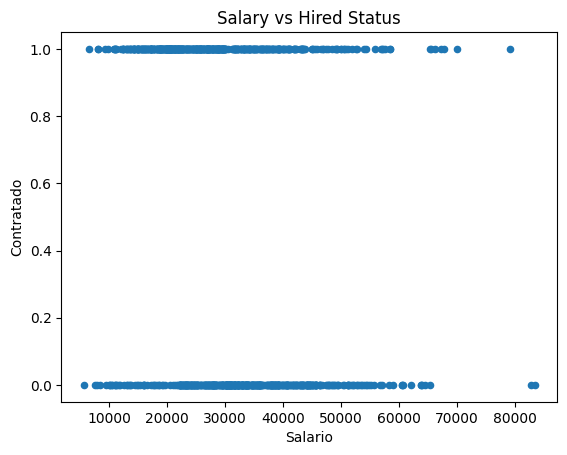

In [14]:
# Quick scatter plot to visualize relationship between Salary and Hired
df.plot(kind='scatter', x='Salario', y='Contratado', title="Salary vs Hired Status")

### Convert categorical variables to dummies

In [15]:
df = pd.get_dummies(df, columns=['Posicion', 'Educacion'])

### Separate features and target variable

In [16]:
X = df.drop(columns='Contratado')
y = df['Contratado']

###  Split the data (70% training, 30% testing)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42, shuffle=True)


## Logistic Regression Model and Evaluation

In [18]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Evaluate model
y_pred_log = log_model.predict(X_test)
log_acc = log_model.score(X_test, y_test)
print(f"\nLogistic Regression Accuracy: {log_acc:.4f}")




Logistic Regression Accuracy: 0.6500


### Confusion matrix

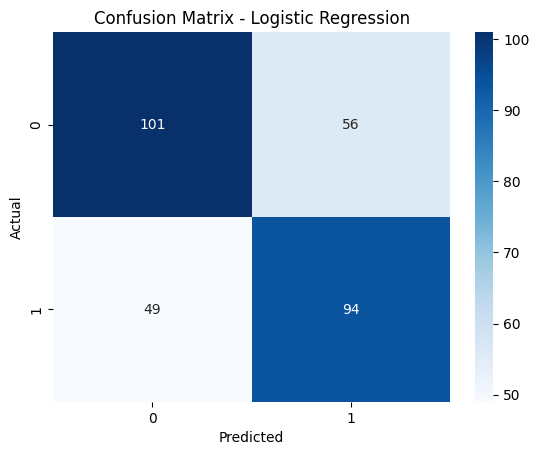

In [19]:
cm_log = confusion_matrix(y_test, y_pred_log)
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

###  ROC Curve & AUC

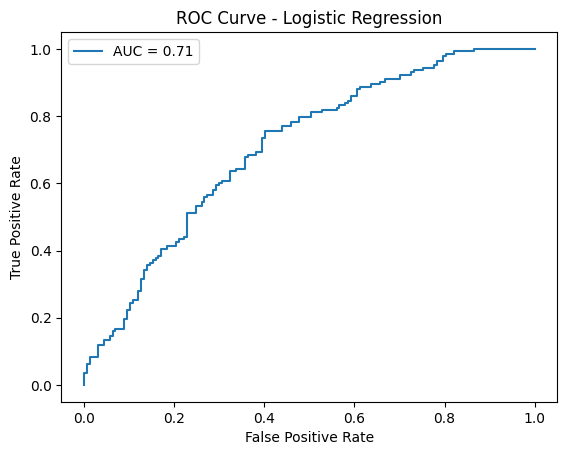

In [20]:
y_pred_proba_log = log_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_log)
auc_log = roc_auc_score(y_test, y_pred_proba_log)

plt.plot(fpr, tpr, label=f'AUC = {auc_log:.2f}')
plt.title("ROC Curve - Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

###  Classification report

In [21]:
print("\nClassification Report - Logistic Regression")
print(classification_report(y_test, y_pred_log))


Classification Report - Logistic Regression
              precision    recall  f1-score   support

           0       0.67      0.64      0.66       157
           1       0.63      0.66      0.64       143

    accuracy                           0.65       300
   macro avg       0.65      0.65      0.65       300
weighted avg       0.65      0.65      0.65       300



## Random Forest Classifier

In [22]:
rf_model = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
rf_acc = rf_model.score(X_test, y_test)
print(f"\nRandom Forest Accuracy: {rf_acc:.4f}")



Random Forest Accuracy: 0.9133


### Confusion matrix

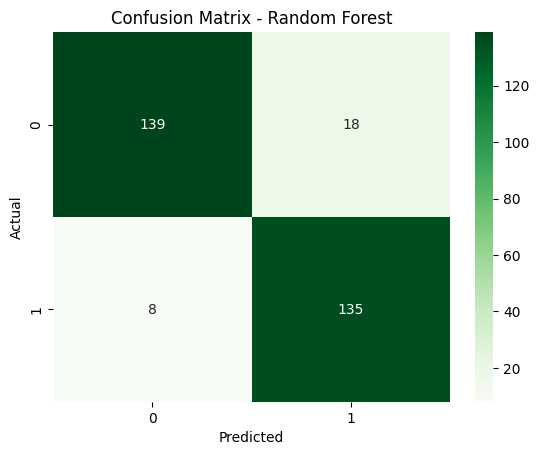

In [23]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

###  ROC Curve & **AUC**

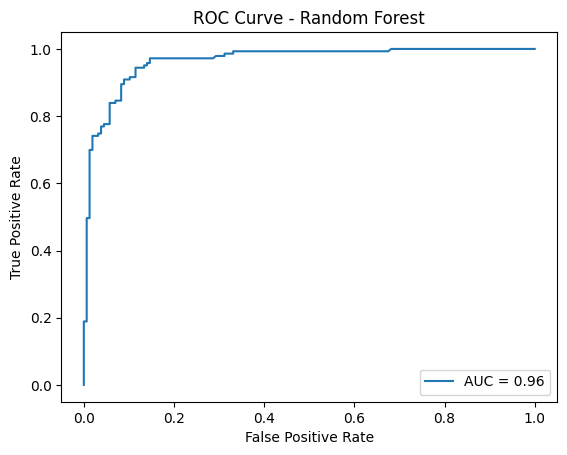

In [24]:
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

plt.plot(fpr_rf, tpr_rf, label=f'AUC = {auc_rf:.2f}')
plt.title("ROC Curve - Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

### Classification report

In [25]:
print("\nClassification Report - Random Forest")
print(classification_report(y_test, y_pred_rf))


Classification Report - Random Forest
              precision    recall  f1-score   support

           0       0.95      0.89      0.91       157
           1       0.88      0.94      0.91       143

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.92      0.91      0.91       300



##Explanation
In the second part of the project, the objective was to develop a classification model to predict whether a candidate would be hired (Contratado = 1) or not (Contratado = 0) based on various input features such as experience, salary expectation, education level, marital status, and number of children.

Two classification models were tested:

###1. Logistic Regression:
Accuracy: 65%

Precision & Recall:

Class 0 (Not Hired): Precision = 0.67, Recall = 0.64

Class 1 (Hired): Precision = 0.63, Recall = 0.66

F1-score: Approximately 0.65 for both classes

Interpretation:
The logistic regression model provided a baseline performance, achieving balanced but moderate precision and recall for both classes. This suggests it had reasonable predictive power but may struggle to capture more complex patterns in the data.

###2. Random Forest Classifier:
Accuracy: 91.33%

Precision & Recall:

Class 0 (Not Hired): Precision = 0.95, Recall = 0.89

Class 1 (Hired): Precision = 0.88, Recall = 0.94

F1-score: 0.91 for both classes

Interpretation:
The Random Forest model significantly outperformed logistic regression, achieving high accuracy and balanced precision and recall across both classes. This indicates that the model was highly effective in capturing the relationships within the data, likely due to its ability to model non-linear patterns and feature interactions.

##Conclusion:
While logistic regression is a simple and interpretable model, the Random Forest classifier demonstrated far superior performance in predicting hiring outcomes. It offers a reliable solution for the classification task and could be recommended for use in practical HR decision-making scenarios where prediction accuracy is critical.

